# GluonTS - Transfer Learning Approach

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_monthly`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_monthly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 
- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

## Imports



In [1]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.1
1.4.1


In [2]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [3]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_finance', 'm4_quarterly_id', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'm4_weekly_domain', 'm4_weekly_id', 'my_wee

In [4]:
dataname_a = "m4_monthly_micro_atm"
dataset_a = get_dataset(dataname_a, regenerate=False)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.


In [5]:
dataname_b = "m4_monthly_nonmicro_10975_seed42"
dataset_b = get_dataset(dataname_b, regenerate=False)

INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed42.


## Check the datasets 

### Dataset A


dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
length train: 10975
length test: 10975

start:
 1750-01-31 00:00:00
target:
 [2320. 2397. 2195. 2375. 2294. 2235. 2288. 2256. 2318. 2290.]
feat_static_cat:
 [1]


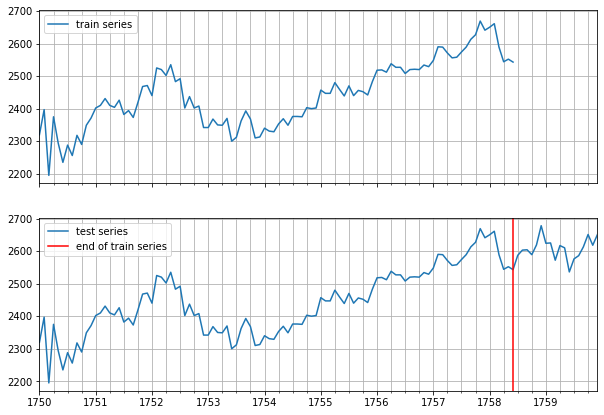

In [8]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset $B_{42}$

dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'item_id', 'target', 'feat_static_cat', 'source'])
length train: 10975
length test: 10975

start:
 1750-01-31 00:00:00
target:
 [ 6500.  4950. 10450.  7050.  5600.  9000. 17500. 10650. 13800.  8000.]
feat_static_cat:
 [1]


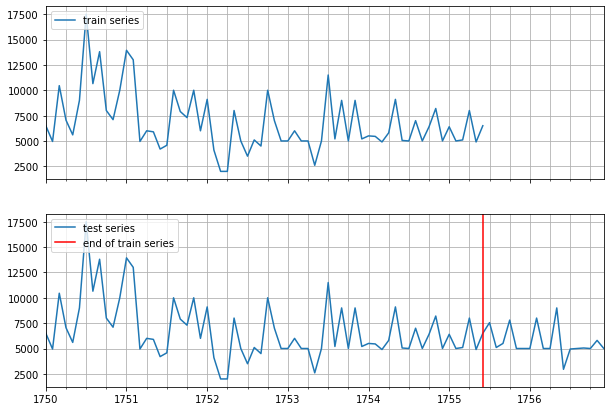

In [9]:
train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [10]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: True
Length test test: True
Frequency test: True


## Modeling: DeepAR

In [6]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [7]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=<MetaData freq='M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='10975'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=18>, train=<gluonts.dataset.common.FileDataset object at 0x000001E8D2F504E0>, test=<gluonts.dataset.common.FileDataset object at 0x000001E8E31DE9B0>)

 TrainDatasets(metadata=<MetaData freq='M' target=None feat_static_cat=[<CategoricalFeatureInfo name='feat_static_cat' cardinality='10975'>] feat_static_real=[] feat_dynamic_real=[] feat_dynamic_cat=[] prediction_length=18>, train=<gluonts.dataset.common.FileDataset object at 0x000001E8E4CCE198>, test=<gluonts.dataset.common.FileDataset object at 0x000001E8E4CF8C50>)


In [8]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
    assert ( len(dataset_a.train)==len(dataset_b.train) )
    assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_b.metadata.prediction_length,
        prediction_length=dataset_b.metadata.prediction_length,
        freq=dataset_b.metadata.freq,
        use_feat_static_cat=False,
    )
    
    # predictor trained on dataset_b
    predictor_b=estimator.train(training_data=dataset_b.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_a.test, predictor=predictor_b, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_a.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_b
    output["eval data"]=dataname_a
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

## Study 1: Random sample training vs. domain-specific training

### Run I.: Training: A, Eval: A

- 10 trials on same dataset from the same domain!
- Seeds from 42 to 51

### Run II.: Training: A, Eval: B

- 10 trials on 10 randomly selected datasets from frequency `monthly`
- seeds from 42 to 52

# Comparison with `monthly_nonmicro`


In [9]:
### data

# a
monthly_micro_a = "m4_monthly_micro_atm"

# b
monthly_nonmicro_b42 = "m4_monthly_nonmicro_10975_seed42"
monthly_nonmicro_b43 = "m4_monthly_nonmicro_10975_seed43"
monthly_nonmicro_b44 = "m4_monthly_nonmicro_10975_seed44"
monthly_nonmicro_b45 = "m4_monthly_nonmicro_10975_seed45"
monthly_nonmicro_b46 = "m4_monthly_nonmicro_10975_seed46"
monthly_nonmicro_b47 = "m4_monthly_nonmicro_10975_seed47"
monthly_nonmicro_b48 = "m4_monthly_nonmicro_10975_seed48"
monthly_nonmicro_b49 = "m4_monthly_nonmicro_10975_seed49"
monthly_nonmicro_b50 = "m4_monthly_nonmicro_10975_seed50"
monthly_nonmicro_b51 = "m4_monthly_nonmicro_10975_seed51"

monthly_nonmicro_b = [monthly_nonmicro_b42, monthly_nonmicro_b43, monthly_nonmicro_b44,
                      monthly_nonmicro_b45, monthly_nonmicro_b46, monthly_nonmicro_b47,
                      monthly_nonmicro_b48, monthly_nonmicro_b49, monthly_nonmicro_b50,
                      monthly_nonmicro_b51]


In [10]:
# use for loop to get list of monthly_nonmicro_b
# to do: use list comprehension

monthly_nonmicro_b = []

for i in range(42, 52):
    filename = "m4_monthly_nonmicro_10975_seed"+str(i)
    monthly_nonmicro_b.append(filename)


monthly_nonmicro_b

['m4_monthly_nonmicro_10975_seed42',
 'm4_monthly_nonmicro_10975_seed43',
 'm4_monthly_nonmicro_10975_seed44',
 'm4_monthly_nonmicro_10975_seed45',
 'm4_monthly_nonmicro_10975_seed46',
 'm4_monthly_nonmicro_10975_seed47',
 'm4_monthly_nonmicro_10975_seed48',
 'm4_monthly_nonmicro_10975_seed49',
 'm4_monthly_nonmicro_10975_seed50',
 'm4_monthly_nonmicro_10975_seed51']

In [11]:
results=pd.DataFrame()

for filename_b, i in zip(monthly_nonmicro_b, range(42,52)):
    print("Filename:", filename_b, "Seed:", i)
    df=deepar_train_eval(dataname_a=monthly_micro_a, dataname_b=filename_b, seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

Filename: m4_monthly_nonmicro_10975_seed42 Seed: 42


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed42.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:13<00:00,  7.52it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[0] Elapsed time 13.331 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.660027
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:11<00:00,  8.46it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[1] Elapsed time 11.822 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.250632
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:11<00:00,  8.50it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 11.782 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.131810
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:11<00:00,  

INFO:root:Loading parameters from best epoch (61)
INFO:root:Epoch[72] Learning rate is 0.0005
100%|██████████| 100/100 [00:10<00:00,  9.49it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[72] Elapsed time 10.540 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.291678
INFO:root:Epoch[73] Learning rate is 0.0005
100%|██████████| 100/100 [00:10<00:00,  9.29it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[73] Elapsed time 10.767 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.244142
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:10<00:00,  9.49it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[74] Elapsed time 10.555 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.201477
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:10<00:00,  9.70it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[75] Elapsed time 10.314 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.210762
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████

100%|██████████| 100/100 [00:12<00:00,  7.90it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[143] Elapsed time 12.678 seconds
INFO:root:Epoch[143] Evaluation metric 'epoch_loss'=6.127429
INFO:root:Epoch[144] Learning rate is 5e-05
100%|██████████| 100/100 [00:10<00:00,  9.69it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[144] Elapsed time 10.343 seconds
INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=6.206523
INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 100/100 [00:10<00:00,  9.63it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[145] Elapsed time 10.388 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.167607
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:10<00:00,  9.26it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[146] Elapsed time 10.818 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.216492
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:11<00:00,  8.88it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[147] Elapsed 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.927931  0.153551  10.505186            0.140264            0.080509   

   seed  epochs  num_batches                        train data  \
0    42     200          100  m4_monthly_nonmicro_10975_seed42   

              eval data  
0  m4_monthly_micro_atm  
Filename: m4_monthly_nonmicro_10975_seed43 Seed: 43


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed43.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.42it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[0] Elapsed time 6.933 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.524596
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.75it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[1] Elapsed time 6.349 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.160011
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.59it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 6.428 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.096303
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.91

INFO:root:Epoch[72] Elapsed time 7.641 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.246567
INFO:root:Epoch[73] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.38it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[73] Elapsed time 6.501 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.303550
INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.41it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[74] Elapsed time 8.060 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.234676
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.46it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[75] Elapsed time 8.052 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.313967
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.64it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[76] Elapsed time 7.337 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.264774
INFO:root:

INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=6.154952
INFO:root:Epoch[145] Learning rate is 0.000125
100%|██████████| 100/100 [00:06<00:00, 14.87it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[145] Elapsed time 6.735 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.179733
INFO:root:Epoch[146] Learning rate is 0.000125
100%|██████████| 100/100 [00:06<00:00, 14.74it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[146] Elapsed time 6.787 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.170815
INFO:root:Epoch[147] Learning rate is 0.000125
100%|██████████| 100/100 [00:06<00:00, 15.17it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[147] Elapsed time 6.611 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.165732
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 100/100 [00:06<00:00, 15.20it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[148] Elapsed time 6.584 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.120856
INFO:root:Loading parameters fr

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.952864  0.154871  11.678852            0.141015            0.079587   

   seed  epochs  num_batches                        train data  \
0    43     200          100  m4_monthly_nonmicro_10975_seed43   

              eval data  
0  m4_monthly_micro_atm  
Filename: m4_monthly_nonmicro_10975_seed44 Seed: 44


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed44.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.56it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[0] Elapsed time 6.895 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.771343
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.22it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[1] Elapsed time 6.577 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.243566
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.87it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 6.731 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.082076
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.8

100%|██████████| 100/100 [00:06<00:00, 15.44it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[72] Elapsed time 6.479 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.251560
INFO:root:Epoch[73] Learning rate is 0.0005
100%|██████████| 100/100 [00:06<00:00, 15.48it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[73] Elapsed time 6.465 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.225219
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:06<00:00, 14.93it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[74] Elapsed time 6.704 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.160853
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 11.65it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[75] Elapsed time 8.600 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.172631
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:06<00:00, 15.17it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[76] Elapsed time 6.591 se

INFO:root:Epoch[144] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.51it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[144] Elapsed time 6.446 seconds
INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=6.178136
INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.92it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[145] Elapsed time 6.281 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.184706
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.80it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[146] Elapsed time 6.328 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.165298
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.45it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[147] Elapsed time 8.031 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.117145
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.74it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.987891  0.154534  11.233592            0.141584            0.080524   

   seed  epochs  num_batches                        train data  \
0    44     200          100  m4_monthly_nonmicro_10975_seed44   

              eval data  
0  m4_monthly_micro_atm  
Filename: m4_monthly_nonmicro_10975_seed45 Seed: 45


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed45.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.37it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[0] Elapsed time 6.507 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.661979
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 16.04it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[1] Elapsed time 6.250 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.153094
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 16.08it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[2] Elapsed time 6.219 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.113396
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.2

INFO:root:Epoch[72] Elapsed time 8.110 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.234010
INFO:root:Epoch[73] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.25it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[73] Elapsed time 8.163 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.273317
INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.79it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[74] Elapsed time 7.267 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.238629
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.97it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[75] Elapsed time 6.679 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.287199
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.55it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[76] Elapsed time 6.873 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.251478
INFO:root

INFO:root:Epoch[145] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 14.31it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[145] Elapsed time 6.993 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.059508
INFO:root:Epoch[146] Learning rate is 0.00025
100%|██████████| 100/100 [00:10<00:00,  9.65it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[146] Elapsed time 10.372 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.114121
INFO:root:Epoch[147] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.32it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[147] Elapsed time 8.124 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.085553
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:07<00:00, 13.81it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[148] Elapsed time 7.242 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.114510
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 14.75it/s,

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.942762  0.147528  11.387537            0.135273            0.077532   

   seed  epochs  num_batches                        train data  \
0    45     200          100  m4_monthly_nonmicro_10975_seed45   

              eval data  
0  m4_monthly_micro_atm  
Filename: m4_monthly_nonmicro_10975_seed46 Seed: 46


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed46.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.25it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 8.910 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.703625
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.34it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[1] Elapsed time 8.111 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.248049
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.49it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 7.435 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.080604
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.61

INFO:root:Epoch[72] Elapsed time 8.365 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.273143
INFO:root:Epoch[73] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.29it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[73] Elapsed time 8.156 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.357076
INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.65it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[74] Elapsed time 7.915 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.289876
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.17it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[75] Elapsed time 8.222 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.293144
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.47it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[76] Elapsed time 8.026 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.294667
INFO:root

INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=6.202855
INFO:root:Epoch[145] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 12.17it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[145] Elapsed time 8.228 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.220858
INFO:root:Epoch[146] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 11.93it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[146] Elapsed time 8.385 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.174512
INFO:root:Loading parameters from best epoch (116)
INFO:root:Epoch[147] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:13<00:00,  7.60it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[147] Elapsed time 13.175 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.126881
INFO:root:Epoch[148] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:09<00:00, 10.54it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[148] Elapsed time 9.516 seconds
INFO:root:Epoch[148] Evaluation metric '

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  0.902664  0.151131  10.93331            0.136548            0.077743    46   

   epochs  num_batches                        train data             eval data  
0     200          100  m4_monthly_nonmicro_10975_seed46  m4_monthly_micro_atm  
Filename: m4_monthly_nonmicro_10975_seed47 Seed: 47


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed47.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:12<00:00,  7.97it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[0] Elapsed time 12.592 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.755030
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:11<00:00,  8.97it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[1] Elapsed time 11.160 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.187982
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:10<00:00,  9.52it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[2] Elapsed time 10.500 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.017580
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 1

INFO:root:Epoch[72] Elapsed time 8.619 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.245822
INFO:root:Epoch[73] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.04it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[73] Elapsed time 8.320 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.261483
INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.14it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[74] Elapsed time 8.241 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.250873
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.99it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[75] Elapsed time 8.343 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.269030
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:09<00:00, 10.92it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[76] Elapsed time 9.170 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.294009
INFO:root

100%|██████████| 100/100 [00:09<00:00, 10.97it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[145] Elapsed time 9.126 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.214005
INFO:root:Epoch[146] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 11.87it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[146] Elapsed time 8.430 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.140341
INFO:root:Epoch[147] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.13it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[147] Elapsed time 8.254 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.154551
INFO:root:Epoch[148] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.01it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[148] Elapsed time 8.334 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.157212
INFO:root:Epoch[149] Learning rate is 0.0005
100%|██████████| 100/100 [00:11<00:00,  9.03it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[149] Elapsed 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.031329  0.154906  12.600335            0.142163            0.079839   

   seed  epochs  num_batches                        train data  \
0    47     200          100  m4_monthly_nonmicro_10975_seed47   

              eval data  
0  m4_monthly_micro_atm  
Filename: m4_monthly_nonmicro_10975_seed48 Seed: 48


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed48.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.78it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[0] Elapsed time 7.282 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.702397
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.57it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[1] Elapsed time 7.389 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.375253
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.56it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 6.875 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.127976
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.51

INFO:root:Epoch[72] Elapsed time 6.454 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.225618
INFO:root:Epoch[73] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.59it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[73] Elapsed time 6.417 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.264746
INFO:root:Epoch[74] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.71it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[74] Elapsed time 6.370 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.244476
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.33it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[75] Elapsed time 7.004 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.239078
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.26it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[76] Elapsed time 7.554 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.211399
INFO:root

100%|██████████| 100/100 [00:06<00:00, 14.89it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[144] Elapsed time 6.723 seconds
INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=6.170093
INFO:root:Epoch[145] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:06<00:00, 15.21it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[145] Elapsed time 6.580 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.142524
INFO:root:Epoch[146] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:07<00:00, 13.62it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[146] Elapsed time 7.347 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.185460
INFO:root:Epoch[147] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:06<00:00, 15.13it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[147] Elapsed time 6.613 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.157066
INFO:root:Epoch[148] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:06<00:00, 15.12it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[148] 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  0.963907  0.150098  11.523465            0.137656            0.078849   

   seed  epochs  num_batches                        train data  \
0    48     200          100  m4_monthly_nonmicro_10975_seed48   

              eval data  
0  m4_monthly_micro_atm  
Filename: m4_monthly_nonmicro_10975_seed49 Seed: 49


INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_micro_atm.
INFO:root:using dataset already processed in path C:\Users\TM\.mxnet\gluon-ts\datasets\m4_monthly_nonmicro_10975_seed49.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.58it/s, avg_epoch_loss=7.8]
INFO:root:Epoch[0] Elapsed time 7.396 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.798391
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 8.238 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.262561
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 14.01it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 7.149 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.094671
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.61

KeyboardInterrupt: 

In [12]:
results

,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,0.927931,0.153551,10.505186,0.140264,0.080509,42,200,100,m4_monthly_nonmicro_10975_seed42,m4_monthly_micro_atm
0,0.952864,0.154871,11.678852,0.141015,0.079587,43,200,100,m4_monthly_nonmicro_10975_seed43,m4_monthly_micro_atm
0,0.987891,0.154534,11.233592,0.141584,0.080524,44,200,100,m4_monthly_nonmicro_10975_seed44,m4_monthly_micro_atm
0,0.942762,0.147528,11.387537,0.135273,0.077532,45,200,100,m4_monthly_nonmicro_10975_seed45,m4_monthly_micro_atm
0,0.902664,0.151131,10.933310,0.136548,0.077743,46,200,100,m4_monthly_nonmicro_10975_seed46,m4_monthly_micro_atm
0,1.031329,0.154906,12.600335,0.142163,0.079839,47,200,100,m4_monthly_nonmicro_10975_seed47,m4_monthly_micro_atm
0,0.963907,0.150098,11.523465,0.137656,0.078849,48,200,100,m4_monthly_nonmicro_10975_seed48,m4_monthly_micro_atm


In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a=monthly_micro_a, dataname_b=monthly_micro_a, seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results